In [ ]:
#Mounting the drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#Importing libraries required to load the data

import zipfile
import os
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import PIL
import PIL.Image




# Keras Sequential Model
# from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [3]:
#Storing the path of the data file from the Google drive
path = 'images/cell_images.zip'

#The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

The files have been extracted to the local session of Google Colab. The extracted folder would have the following structure:

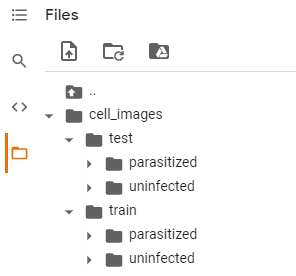

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [4]:
#Storing the path of the extracted "train" folder 
train_dir = 'cell_images/train'

#Size of image so that each image has the same size
SIZE = 224

#Empty list to store the training images after they are converted to NumPy arrays
train_images = []

#Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [5]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            #Resizing each image to (224,224)
            image = image.resize((SIZE, SIZE))

            #Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [6]:
#Storing the path of the extracted "test" folder 
test_dir = 'cell_images/test'

#Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 224

#Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

#Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [7]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            #Resizing each image to (224,224)
            image = image.resize((SIZE, SIZE))
            
            #Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [8]:
len(train_images), len(train_labels)

(24958, 24958)

In [9]:
print('Training set:', train_images.shape, train_labels.shape)
print('Test set:', test_images.shape, test_labels.shape)

Training set: (24958, 224, 224, 3) (24958,)
Test set: (2600, 224, 224, 3) (2600,)


In [10]:
num_classes = 2
classes = ["parasitized", "uninfected"]

In [11]:
class_names = classes
print(class_names)

['parasitized', 'uninfected']


## visualizing the data

<ipython-input-12-5313cb0e05a6>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3, 3, i + 1)


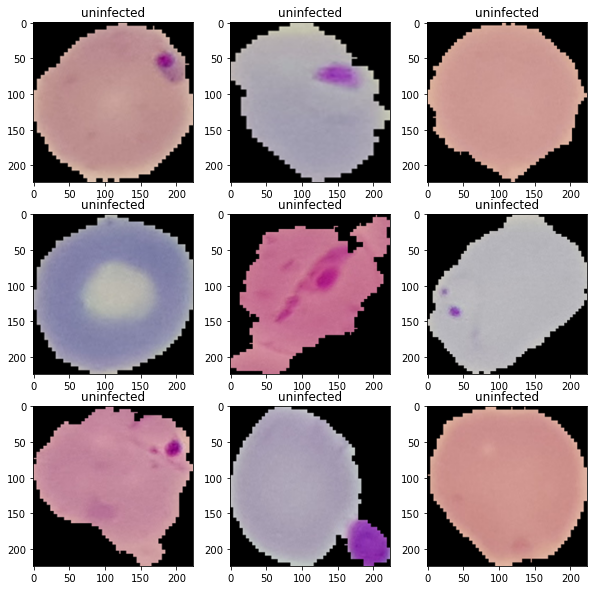

In [12]:
rows = 3
cols = 4
fig = plt.figure(figsize=(10, 10))
for i in range(cols):
    for i in range(9):
        random_index = np.random.randint(0, len(train_labels))
        ax = plt.subplot(3, 3, i + 1)
        ax.imshow(train_images[random_index, :])
        plt.title(class_names[train_labels[i]])
plt.show()

In [15]:
!pip install opencv-python

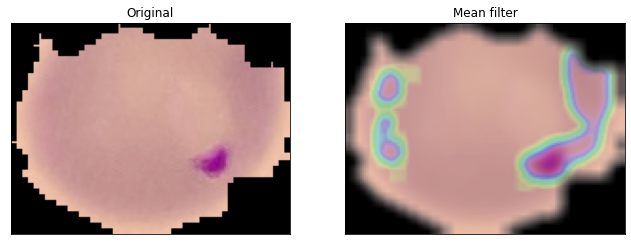

In [16]:
import cv2
from PIL import Image, ImageFilter
%matplotlib inline
image = cv2.imread('cell_224.png') # reads the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 9 # the dimension of the x and y axis of the kernal.
new_image = cv2.blur(image,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

### Standardize the data

The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small. Here, you will standardize values to be in the [0, 1] range by normilizing the data using one hot encoding.

In [17]:
x_train_normalized = train_images.astype('float32')/255
x_test_normalized = test_images.astype('float32')/255

In [18]:
y_train_encoded = tf.keras.utils.to_categorical(train_labels)
y_test_encoded = tf.keras.utils.to_categorical(test_labels)

AlreadyExistsError: Another metric with the same name already exists.

## Building the CNN Model

In [ ]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Imporing the libraries as required. Note that we are using tensorflow.keras here.

# Initiating the sequential model object
model = tf.keras.Sequential()

# Generating the model and adding layers
# Two convolution layers and pooling layer
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', data_format='channels_last', input_shape=(224,224,3)))
#model.add(Dropout(0.2))
#odel.add(Dense(32, activation='relu'))

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

# Flattening the model and making room for the fully connected component
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
# Optimizer for the model, Adam with a learning rate(lr) of 0.005.
optimizer = Adam(learning_rate=0.005)

# Compile the model with the optimizer, loss (binary_crossentropy) and the metrics (accuracy) to look at.
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
#Fitting the model
history_2 = model.fit(
            x_train_normalized, y_train_encoded,
            validation_data= (x_test_normalized, y_test_encoded),
            epochs=10,
            batch_size=64,
            shuffle=True,
            verbose=2
)

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Plot the loss of the model during training
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
def metrics_score(actual, predicted):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=classes, yticklabels=classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
test_pred = np.argmax(model.predict(test_images), axis=-1)

metrics_score(test_labels, test_pred)

In [ ]:
rows = 4
cols = 6
fig = plt.figure(figsize=(15, 15))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(test_labels))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(test_images[random_index, :])
        pred_label = class_names[test_pred[random_index]]
        true_label = class_names[test_labels[random_index]]
        y_pred_test_max_probas = np.max(model.predict(test_images), axis=-1)
        pred_proba = y_pred_test_max_probas[random_index]
        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba
        ))
plt.show()